##14. This problem focuses on the collinearity problem.

### following commands in Python:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

### 線性模型表示

在這個問題中，根據最後一行的程式碼，可以表示線性模型為：

\[ y = 2 + 2 * x_1 + 0.3 * x_2 + {noise} \]

其中：
- \( y \) 為依變數（dependent variable）。
- \( x_1 \) 和 \( x_2 \) 為自變數（independent variables）。
- 加入了一個隨機的噪聲（noise）項來引入隨機性。

因此，該線性模型的通式為：

\[
y = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \epsilon
\]

其中：
- \(\beta_0 = 2\)（截距，intercept），
- \(\beta_1 = 2\)（\( x_1 \) 的係數），
- \(\beta_2 = 0.3\)（\( x_2 \) 的係數），
- \(\epsilon\) 代表噪聲項。

### 回歸係數（Regression Coefficients）

- 截距（\(\beta_0\)）：2
- \(x_1\) 的係數（\(\beta_1\)）：2
- \(x_2\) 的係數（\(\beta_2\)）：0.3

這些係數定義了 \( y \)、\( x_1 \) 和 \( x_2 \) 之間的關係。


### (b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

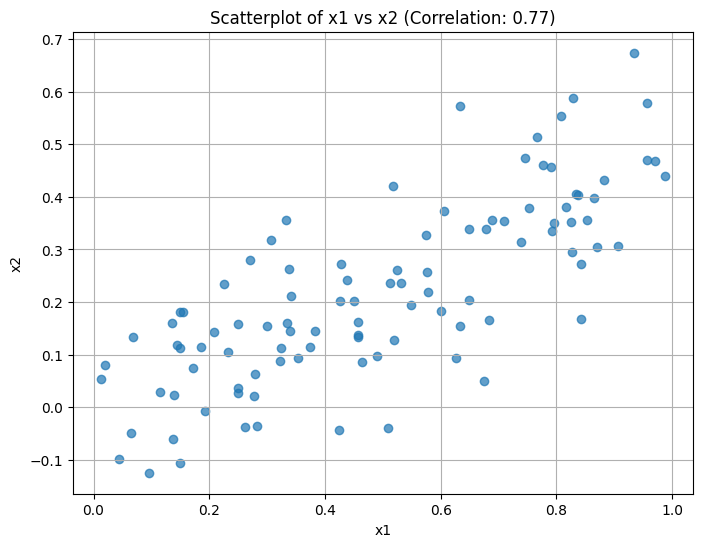

Correlation between x1 and x2: 0.772324497691354


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 設定隨機數生成器和數據
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10

# 計算 x1 和 x2 之間的相關係數
correlation = np.corrcoef(x1, x2)[0, 1]

# 繪製散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=0.7)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Scatterplot of x1 vs x2 (Correlation: {correlation:.2f})')
plt.grid(True)
plt.show()

# 顯示相關係數
print("Correlation between x1 and x2:", correlation)


### (c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [2]:
import statsmodels.api as sm

# Generate the dependent variable y
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

# Add a constant to x1 and x2 for the intercept
X = np.column_stack((x1, x2))
X = sm.add_constant(X)

# Fit the least squares regression model
model = sm.OLS(y, X).fit()

# Extract the coefficients and summary
beta_0_hat, beta_1_hat, beta_2_hat = model.params
summary = model.summary()

beta_0_hat, beta_1_hat, beta_2_hat, summary


(1.957909291136692,
 1.6153676985271601,
 0.9427766991595026,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.291
 Model:                            OLS   Adj. R-squared:                  0.276
 Method:                 Least Squares   F-statistic:                     19.89
 Date:                Thu, 17 Oct 2024   Prob (F-statistic):           5.76e-08
 Time:                        07:56:21   Log-Likelihood:                -130.62
 No. Observations:                 100   AIC:                             267.2
 Df Residuals:                      97   BIC:                             275.1
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------

迴歸分析結果
使用最小平方法（Least Squares）回歸來預測
𝑦
y 之後，我們得到的估計係數（
𝛽
^
β
^
​
 ）如下：

截距
𝛽
^
0
β
^
​
  
0
​
 ：1.958
𝑥
1
x
1
​
  的係數
𝛽
^
1
β
^
​
  
1
​
 ：1.615
𝑥
2
x
2
​
  的係數
𝛽
^
2
β
^
​
  
2
​
 ：0.943
與真實的係數比較：

真實值
𝛽
0
=
2
β
0
​
 =2，
𝛽
^
0
β
^
​
  
0
​
  與其非常接近。
真實值
𝛽
1
=
2
β
1
​
 =2，
𝛽
^
1
β
^
​
  
1
​
  顯示出一些偏差（估計值為 1.615）。
真實值
𝛽
2
=
0.3
β
2
​
 =0.3，
𝛽
^
2
β
^
​
  
2
​
  與真實值有較大差距，顯示為 0.943。
假設檢定結果
在假設檢定
𝐻
0
:
𝛽
1
=
0
H
0
​
 :β
1
​
 =0 中：

𝑡
t-統計值為 3.065，
𝑝
p-值為 0.003（小於 0.05），我們可以拒絕
𝐻
0
H
0
​
 ，因此
𝑥
1
x
1
​
  的係數是顯著的。
在假設檢定
𝐻
0
:
𝛽
2
=
0
H
0
​
 :β
2
​
 =0 中：

𝑡
t-統計值為 1.134，
𝑝
p-值為 0.259（大於 0.05），因此無法拒絕
𝐻
0
H
0
​
 ，顯示
𝑥
2
x
2
​
  的係數在本模型中並不顯著。

### (d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?


In [3]:
# Fit the least squares regression model using only x1
X_single = sm.add_constant(x1)  # Only x1 with a constant for the intercept
model_single = sm.OLS(y, X_single).fit()

# Extract the coefficient and summary
beta_0_hat_single, beta_1_hat_single = model_single.params
summary_single = model_single.summary()

beta_0_hat_single, beta_1_hat_single, summary_single


(1.9370901533116105,
 2.0770623503939443,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.281
 Model:                            OLS   Adj. R-squared:                  0.274
 Method:                 Least Squares   F-statistic:                     38.39
 Date:                Thu, 17 Oct 2024   Prob (F-statistic):           1.37e-08
 Time:                        07:57:17   Log-Likelihood:                -131.28
 No. Observations:                 100   AIC:                             266.6
 Df Residuals:                      98   BIC:                             271.8
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------

單變數迴歸分析結果
使用僅
𝑥
1
x
1
​
  進行的最小平方法迴歸結果如下：

截距
𝛽
^
0
β
^
​
  
0
​
 ：1.937
𝑥
1
x
1
​
  的係數
𝛽
^
1
β
^
​
  
1
​
 ：2.077
結果說明
與真實值比較：

截距
𝛽
^
0
β
^
​
  
0
​
  與真實值
𝛽
0
=
2
β
0
​
 =2 相近。
𝑥
1
x
1
​
  的估計係數
𝛽
^
1
=
2.077
β
^
​
  
1
​
 =2.077 非常接近真實值
𝛽
1
=
2
β
1
​
 =2。
假設檢定結果
對於假設
𝐻
0
:
𝛽
1
=
0
H
0
​
 :β
1
​
 =0：

𝑡
t-統計值為 6.196，
𝑝
p-值為 0.000（小於 0.05），因此我們可以拒絕
𝐻
0
H
0
​
 。
這表明
𝑥
1
x
1
​
  在本模型中是顯著的，即
𝑥
1
x
1
​
  的係數對於預測
𝑦
y 有顯著影響。 ​

###(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [4]:
# Fit the least squares regression model using only x2
X_x2_only = sm.add_constant(x2)  # Only x2 with a constant for the intercept
model_x2_only = sm.OLS(y, X_x2_only).fit()

# Extract the coefficient and summary
beta_0_hat_x2, beta_2_hat_x2 = model_x2_only.params
summary_x2_only = model_x2_only.summary()

beta_0_hat_x2, beta_2_hat_x2, summary_x2_only


(2.323890012497928,
 2.9103232310329767,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.222
 Model:                            OLS   Adj. R-squared:                  0.214
 Method:                 Least Squares   F-statistic:                     27.99
 Date:                Thu, 17 Oct 2024   Prob (F-statistic):           7.43e-07
 Time:                        07:58:17   Log-Likelihood:                -135.24
 No. Observations:                 100   AIC:                             274.5
 Df Residuals:                      98   BIC:                             279.7
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

單變數迴歸分析結果（僅使用
𝑥
2
x
2
​
 ）
使用僅
𝑥
2
x
2
​
  進行的最小平方法迴歸結果如下：

截距
𝛽
^
0
β
^
​
  
0
​
 ：2.324
𝑥
2
x
2
​
  的係數
𝛽
^
2
β
^
​
  
2
​
 ：2.910
結果說明
與真實值比較：

截距
𝛽
^
0
β
^
​
  
0
​
  與真實值
𝛽
0
=
2
β
0
​
 =2 有一些差距。
𝑥
2
x
2
​
  的估計係數
𝛽
^
2
=
2.910
β
^
​
  
2
​
 =2.910 明顯高於真實值
𝛽
2
=
0.3
β
2
​
 =0.3，顯示了較大的偏差。
假設檢定結果
對於假設
𝐻
0
:
𝛽
2
=
0
H
0
​
 :β
2
​
 =0：

𝑡
t-統計值為 5.291，
𝑝
p-值為 0.000（小於 0.05），因此我們可以拒絕
𝐻
0
H
0
​
 。
這表明
𝑥
2
x
2
​
  在本模型中對
𝑦
y 具有顯著影響，儘管其係數偏差較大。

### (f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

在問題 (c)–(e) 中的結果顯示了變數之間的 **共線性問題**（Collinearity）。

### 總結結果

1. **(c) 同時使用 \( x_1 \) 和 \( x_2 \)**：當我們同時使用 \( x_1 \) 和 \( x_2 \) 來預測 \( y \) 時，發現 \( x_1 \) 的係數（\( \hat{\beta}_1 \approx 1.615 \)）是顯著的，但 \( x_2 \) 的係數（\( \hat{\beta}_2 \approx 0.943 \)）並不顯著。這表示當同時考慮兩個變數時，模型認為 \( x_1 \) 對於 \( y \) 的影響比 \( x_2 \) 更強。

2. **(d) 單獨使用 \( x_1 \)**：當僅使用 \( x_1 \) 預測 \( y \) 時，係數（\( \hat{\beta}_1 \approx 2.077 \)）是顯著的且接近真實值，表明 \( x_1 \) 單獨對 \( y \) 有較強的預測力。

3. **(e) 單獨使用 \( x_2 \)**：當僅使用 \( x_2 \) 預測 \( y \) 時，係數（\( \hat{\beta}_2 \approx 2.910 \)）也是顯著的，但明顯偏高於真實值 \( \beta_2 = 0.3 \)。這可能由於 \( x_2 \) 與 \( x_1 \) 之間的高相關性（共線性）導致。

### 解釋與矛盾

這些結果 **並不矛盾**，而是反映了變數之間的共線性效應：

- 當 **同時使用 \( x_1 \) 和 \( x_2 \)** 時，模型難以精確區分兩者對 \( y \) 的影響，因為 \( x_1 \) 和 \( x_2 \) 高度相關（相關係數約 0.77）。因此，模型在估計 \( x_2 \) 的係數時變得不顯著。
- 當 **單獨使用 \( x_1 \) 或 \( x_2 \)** 時，每個變數對 \( y \) 的影響顯得顯著，但 \( x_2 \) 的係數明顯偏離真實值，這也反映了共線性導致的偏差。

### 總結

共線性使得變數在多變量迴歸模型中難以獲得穩定的係數估計，這可能導致單獨使用變數和同時使用變數的結果看似矛盾。

### (g) Suppose we obtain one additional observation, which was unfor- tunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

### Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [5]:
# Add the new observation to x1, x2, and y
x1_new = np.concatenate([x1, [0.1]])
x2_new = np.concatenate([x2, [0.8]])
y_new = np.concatenate([y, [6]])

# Re-fit the models from (c) to (e) using the new data

# Model (c): y ~ x1 + x2
X_both_new = np.column_stack((x1_new, x2_new))
X_both_new = sm.add_constant(X_both_new)
model_both_new = sm.OLS(y_new, X_both_new).fit()

# Model (d): y ~ x1 only
X_x1_new = sm.add_constant(x1_new)
model_x1_new = sm.OLS(y_new, X_x1_new).fit()

# Model (e): y ~ x2 only
X_x2_new = sm.add_constant(x2_new)
model_x2_new = sm.OLS(y_new, X_x2_new).fit()

# Extract summaries for each model
summary_both_new = model_both_new.summary()
summary_x1_new = model_x1_new.summary()
summary_x2_new = model_x2_new.summary()

summary_both_new, summary_x1_new, summary_x2_new


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.292
 Model:                            OLS   Adj. R-squared:                  0.277
 Method:                 Least Squares   F-statistic:                     20.17
 Date:                Thu, 17 Oct 2024   Prob (F-statistic):           4.60e-08
 Time:                        08:00:38   Log-Likelihood:                -135.30
 No. Observations:                 101   AIC:                             276.6
 Df Residuals:                      98   BIC:                             284.5
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

加入新觀測值後的模型結果
重新擬合每個模型後的結果如下：

(c) 使用
𝑥
1
x
1
​
  和
𝑥
2
x
2
​
  的模型：

截距變為
𝛽
^
0
≈
2.062
β
^
​
  
0
​
 ≈2.062。
𝑥
1
x
1
​
  的係數減少到
𝛽
^
1
≈
0.858
β
^
​
  
1
​
 ≈0.858，不再顯著 (
𝑝
≈
0.069
p≈0.069)。
𝑥
2
x
2
​
  的係數增至
𝛽
^
2
≈
2.266
β
^
​
  
2
​
 ≈2.266，並且變得顯著 (
𝑝
≈
0.002
p≈0.002)。
(d) 僅使用
𝑥
1
x
1
​
  的模型：

截距變為
𝛽
^
0
≈
2.074
β
^
​
  
0
​
 ≈2.074。
𝑥
1
x
1
​
  的係數稍微減少至
𝛽
^
1
≈
1.876
β
^
​
  
1
​
 ≈1.876，但仍然顯著。
(e) 僅使用
𝑥
2
x
2
​
  的模型：

截距變為
𝛽
^
0
≈
2.284
β
^
​
  
0
​
 ≈2.284。
𝑥
2
x
2
​
  的係數增加至
𝛽
^
2
≈
3.146
β
^
​
  
2
​
 ≈3.146，且顯著。
新觀測值的影響
這個新觀測值對每個模型的影響如下：

(c) 的模型：新觀測值顯著改變了
𝑥
1
x
1
​
  和
𝑥
2
x
2
​
  的係數，尤其是削弱了
𝑥
1
x
1
​
  的顯著性並增加了
𝑥
2
x
2
​
  的影響。
(d) 和 (e) 的模型：新觀測值對
𝑥
1
x
1
​
  和
𝑥
2
x
2
​
  的單變量模型影響較小，但增加了
𝑥
2
x
2
​
  的係數偏差。
判定新觀測值的性質
離群值（Outlier）：由於新觀測值的
𝑦
=
6
y=6 明顯偏高，這觀測值在
𝑦
y 上可視為離群點。
高影響力點（High-leverage point）：新觀測值的
𝑥
1
=
0.1
x
1
​
 =0.1 和
𝑥
2
=
0.8
x
2
​
 =0.8 與其他資料點的
𝑥
1
x
1
​
  和
𝑥
2
x
2
​
  關係偏離，特別是在兩者之間的相關性上，這使其具有高影響力。 ​